In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
from tabulate import tabulate

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import plotly.express as px
import plotly.graph_objects as go

import warnings
warnings.filterwarnings('ignore')

In [2]:
!pip install tabulate


In [3]:
df = pd.read_csv("dataset1_80.csv")

In [4]:
df.head(10)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
5,AL,118,510,Yes,No,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False
6,MA,121,510,No,Yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False
7,MO,147,415,Yes,No,0,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False
8,WV,141,415,Yes,Yes,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False
9,RI,74,415,No,No,0,187.7,127,31.91,163.4,148,13.89,196.0,94,8.82,9.1,5,2.46,0,False


In [5]:
def check_data(data):
    col_info = {}
    for col in data.columns:
        dtype = data[col].dtypes
        valid_instances = data[col].count()
        unique = data[col].nunique()
        null_count = data[col].isnull().sum()
        col_info[col] = dtype, valid_instances, unique, null_count
    data_check = pd.DataFrame(col_info, index=["dtype", "valid_instances", "unique", "total_null"]).T
    return data_check
check_data(df)

,dtype,valid_instances,unique,total_null
State,object,2666,51,0
Account length,int64,2666,205,0
Area code,int64,2666,3,0
International plan,object,2666,2,0
Voice mail plan,object,2666,2,0
Number vmail messages,int64,2666,42,0
Total day minutes,float64,2666,1489,0
Total day calls,int64,2666,115,0
Total day charge,float64,2666,1489,0
Total eve minutes,float64,2666,1442,0


In [6]:
df.select_dtypes(exclude='object').describe().T

,count,mean,std,min,25%,50%,75%,max
Account length,2666.0,100.620405,39.563974,1.00,73.0000,100.00,127.000,243.00
Area code,2666.0,437.438860,42.521018,408.00,408.0000,415.00,510.000,510.00
Number vmail messages,2666.0,8.021755,13.612277,0.00,0.0000,0.00,19.000,50.00
Total day minutes,2666.0,179.481620,54.210350,0.00,143.4000,179.95,215.900,350.80
Total day calls,2666.0,100.310203,19.988162,0.00,87.0000,101.00,114.000,160.00
Total day charge,2666.0,30.512404,9.215733,0.00,24.3800,30.59,36.700,59.64
Total eve minutes,2666.0,200.386159,50.951515,0.00,165.3000,200.90,235.100,363.70
Total eve calls,2666.0,100.023631,20.161445,0.00,87.0000,100.00,114.000,170.00
Total eve charge,2666.0,17.033072,4.330864,0.00,14.0500,17.08,19.980,30.91
Total night minutes,2666.0,201.168942,50.780323,43.70,166.9250,201.15,236.475,395.00


In [7]:
# Từ điển chuyển đổi
bool_dict = {'No': 0, 'Yes': 1}

# Chuyển 2 cột từ Yes/No sang 0/1
for col in ['International plan', 'Voice mail plan']:
    # Nếu kiểu dữ liệu là object, thì mới chuyển đổi
    if df[col].dtype == 'object':
        df[col] = df[col].str.strip().str.title().map(bool_dict).astype(int)

# Kiểm tra lại
print(df['International plan'].unique())
print(df['Voice mail plan'].unique())

[0 1]
[1 0]


In [10]:
df['Area code'] = df['Area code'].astype('category')
check_data(df)

,dtype,valid_instances,unique,total_null
State,object,2666,51,0
Account length,int64,2666,205,0
Area code,category,2666,3,0
International plan,int64,2666,2,0
Voice mail plan,int64,2666,2,0
Number vmail messages,int64,2666,42,0
Total day minutes,float64,2666,1489,0
Total day calls,int64,2666,115,0
Total day charge,float64,2666,1489,0
Total eve minutes,float64,2666,1442,0


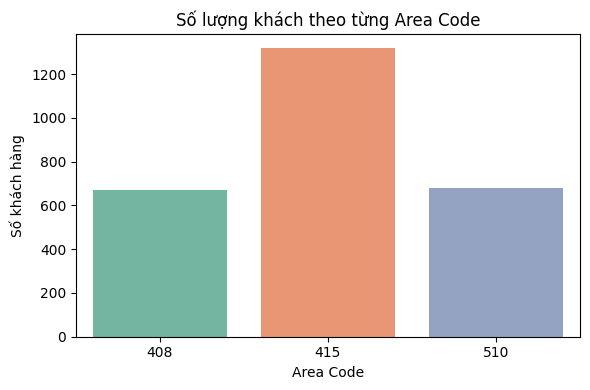

In [23]:
#EDA
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Area code', palette='Set2')

plt.title('Số lượng khách theo từng Area Code')
plt.xlabel('Area Code')
plt.ylabel('Số khách hàng')
plt.tight_layout()
plt.show()

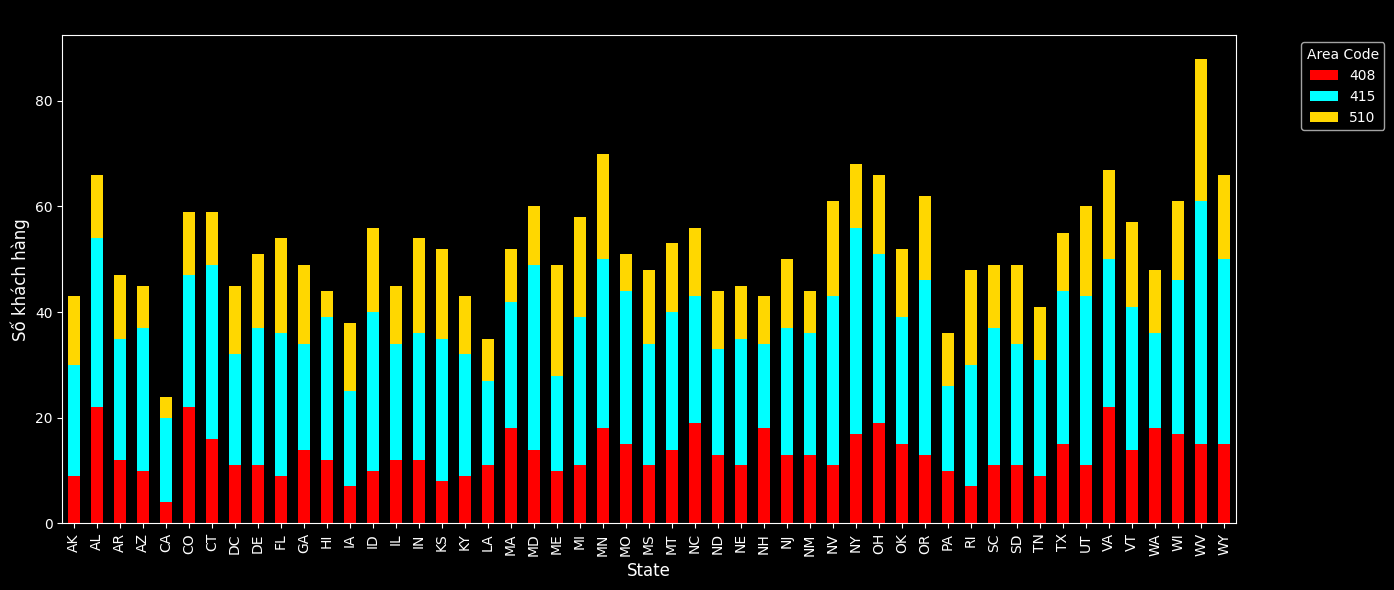

In [28]:
state_area_counts = df.groupby(['State', 'Area code']).size().unstack(fill_value=0)

# Tạo custom color palette đỏ – đen (số màu theo số area code)
color_palette = ['#FF0000', '#00FFFF', '#FFD700']  # dark red tones (3 area codes)

# Vẽ stacked bar plot
state_area_counts.sort_index(inplace=True)
state_area_counts.plot(
    kind='bar',
    stacked=True,
    figsize=(14, 6),
    color=color_palette
)

plt.title('Số khách hàng theo Area Code trong từng State', fontsize=14, color='black')
plt.xlabel('State', fontsize=12)
plt.ylabel('Số khách hàng', fontsize=12)
plt.xticks(rotation=90)
plt.legend(title='Area Code', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(False)
plt.tight_layout()

plt.show()

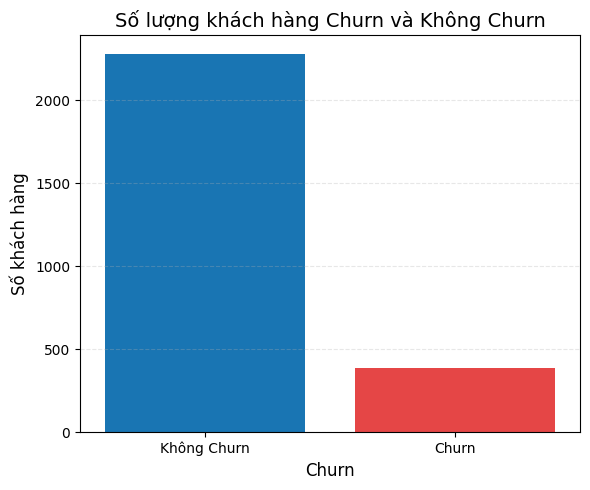

In [31]:
# Trả về style mặc định (nền sáng)
plt.style.use('default')

# Dữ liệu đếm churn
# Đếm số lượng True/False an toàn (tự động sắp xếp đúng thứ tự)
churn_counts = df['Churn'].value_counts().reindex([False, True], fill_value=0)


# Vẽ biểu đồ
plt.figure(figsize=(6, 5))
sns.barplot(x=churn_counts.index, y=churn_counts.values, palette=['#007acc', '#ff2c2c'])  # xanh dương - đỏ

# Tùy chỉnh
plt.title('Số lượng khách hàng Churn và Không Churn', fontsize=14)
plt.xlabel('Churn', fontsize=12)
plt.ylabel('Số khách hàng', fontsize=12)
plt.xticks([0, 1], ['Không Churn', 'Churn'])
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

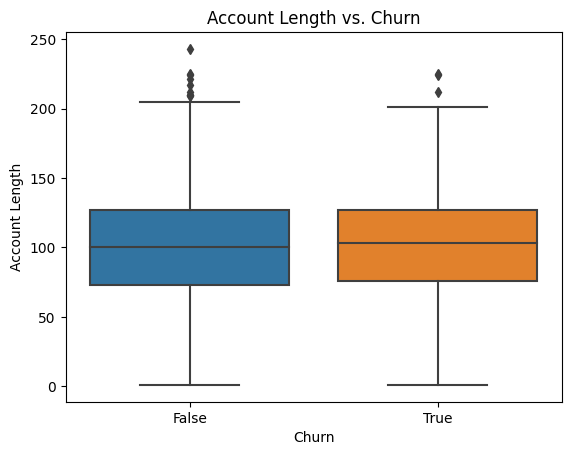

In [42]:
sns.boxplot(x='Churn', y='Account length', data=df)
plt.title('Account Length vs. Churn')
plt.xlabel('Churn')
plt.ylabel('Account Length')
plt.show()


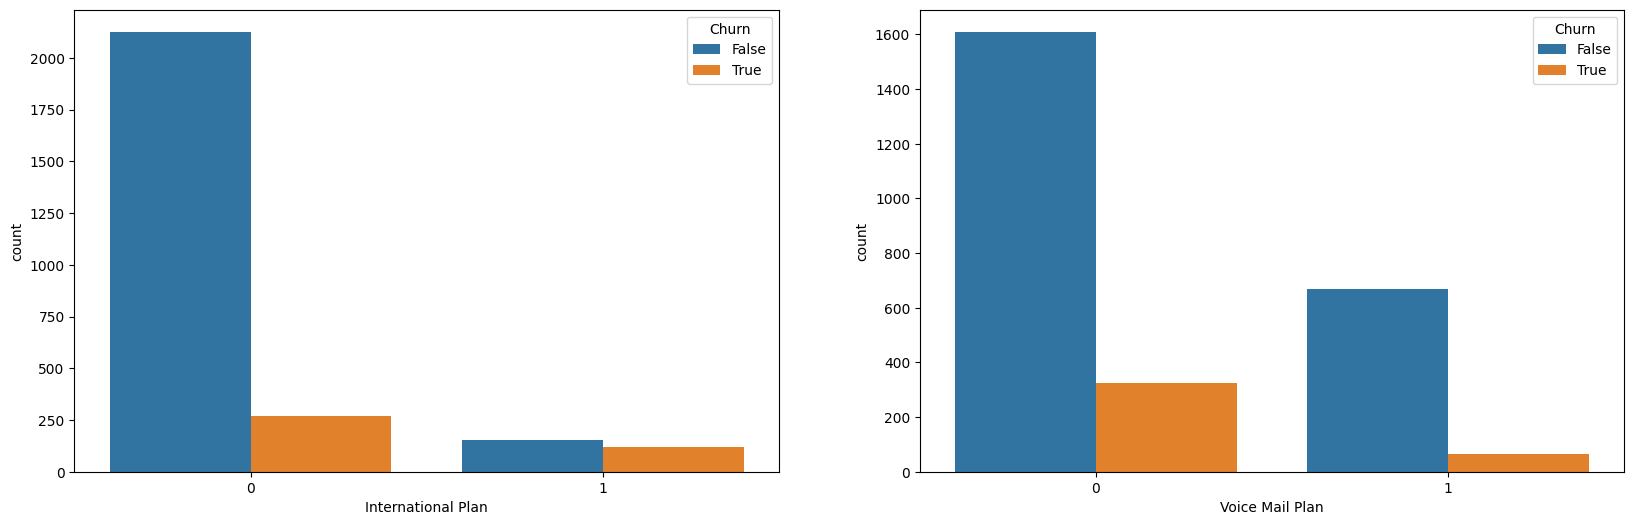

In [41]:
fig, axs = plt.subplots(1, 2, figsize=(20, 6))

sns.countplot(x='International plan', hue='Churn', data=df, ax=axs[0])
axs[0].set_xlabel('International Plan')

sns.countplot(x='Voice mail plan', hue='Churn', data=df, ax=axs[1])
axs[1].set_xlabel('Voice Mail Plan')

plt.show()


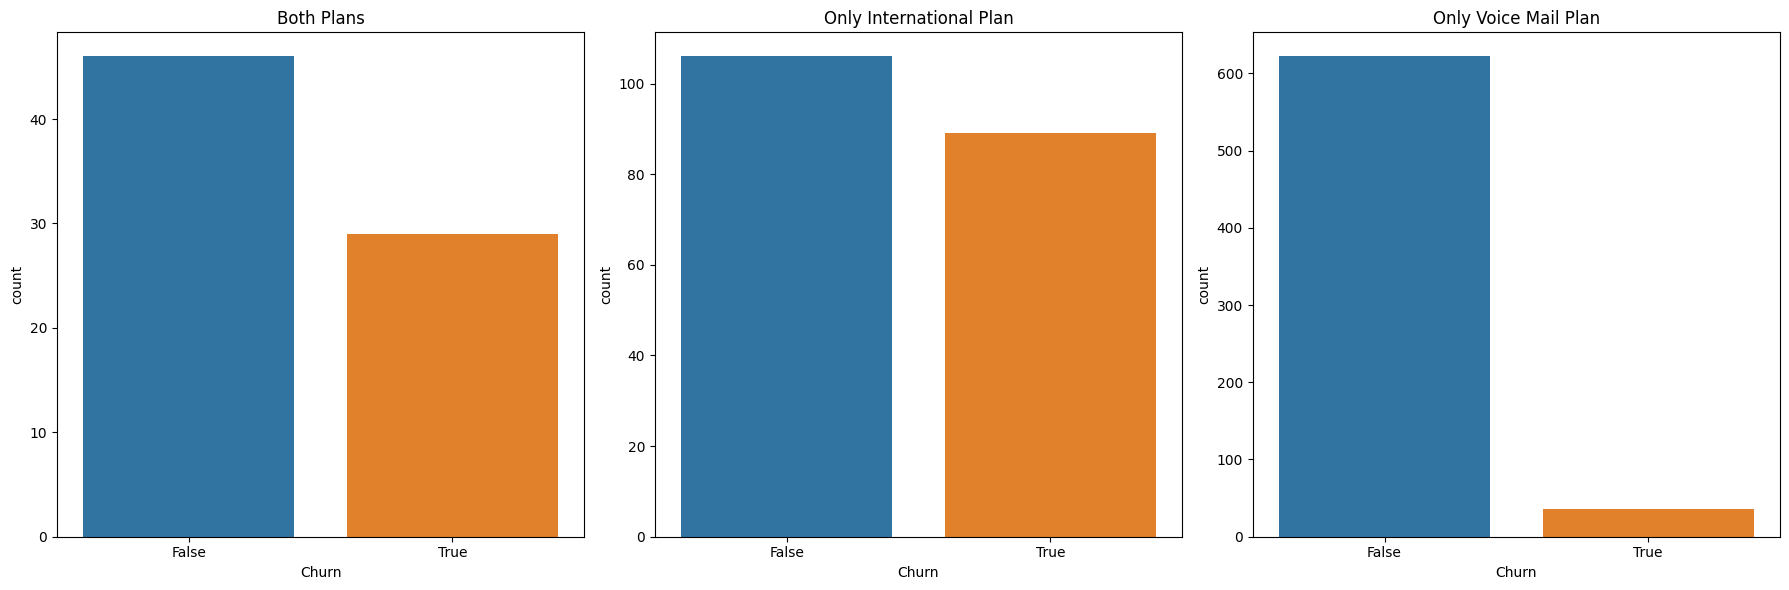

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Tạo các subset theo điều kiện
both = df[(df['International plan'] == 1) & (df['Voice mail plan'] == 1)]
only_plan = df[(df['International plan'] == 1) & (df['Voice mail plan'] == 0)]
only_voice = df[(df['International plan'] == 0) & (df['Voice mail plan'] == 1)]

# Set up biểu đồ 3 cột
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Vẽ từng nhóm
sns.countplot(data=both, x='Churn', ax=axs[0])
axs[0].set_title('Both Plans')

sns.countplot(data=only_plan, x='Churn', ax=axs[1])
axs[1].set_title('Only International Plan')

sns.countplot(data=only_voice, x='Churn', ax=axs[2])
axs[2].set_title('Only Voice Mail Plan')

plt.tight_layout()
plt.show()
# thêm churn rate


## Phân tích nhóm những thông tin về cuộc gọi quốc tế


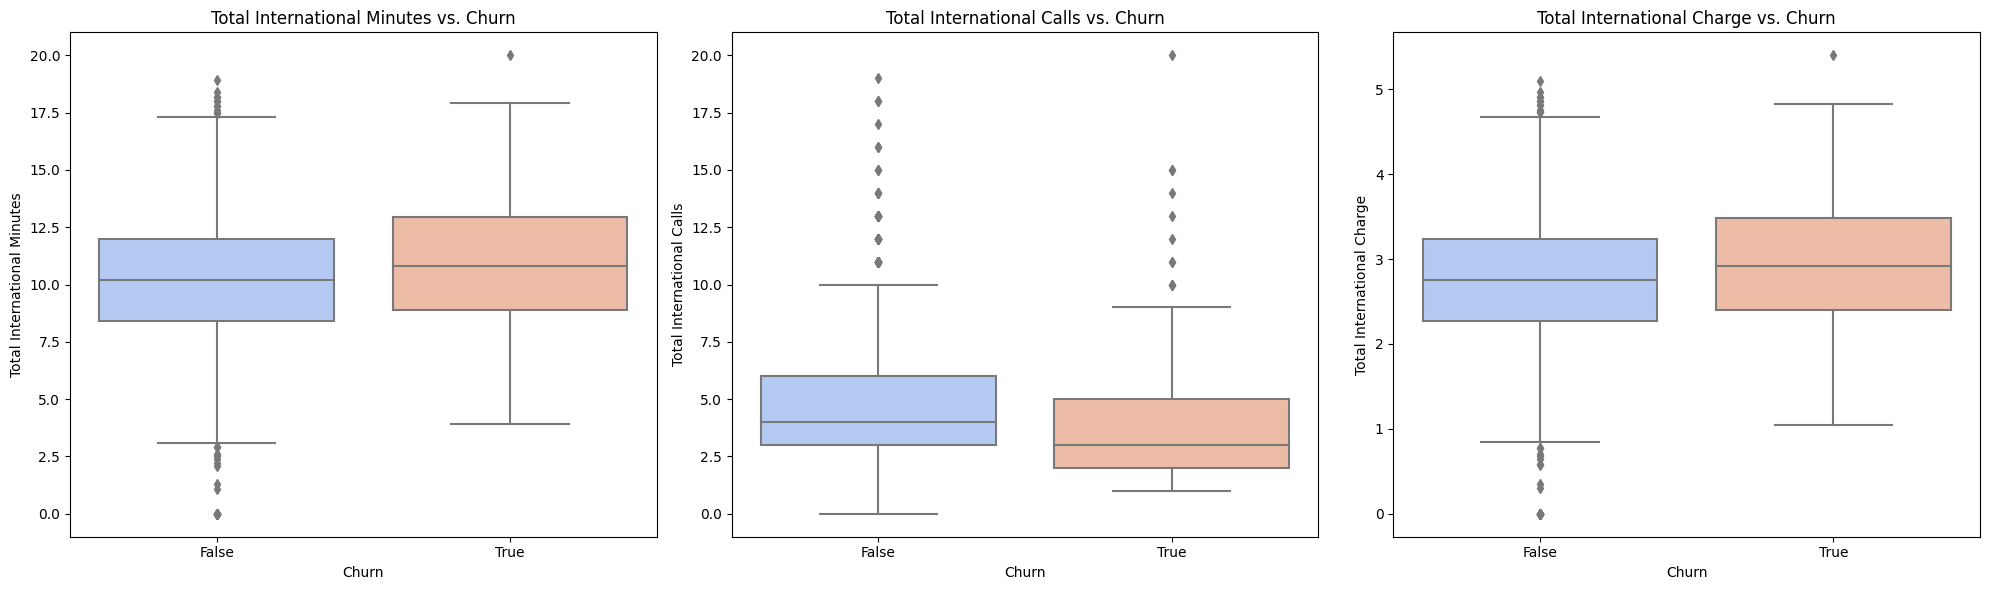

      Total intl minutes                  Total intl calls                   \
                    mean median       std             mean median       std   
Churn                                                                         
False           10.13784   10.2  2.779622         4.538191    4.0  2.447533   
True            10.81933   10.8  2.771824         4.051546    3.0  2.468912   

      Total intl charge                   
                   mean median       std  
Churn                                     
False          2.737709   2.75  0.750441  
True           2.921727   2.92  0.748431  


In [12]:
# Các cặp (tên cột, tiêu đề, nhãn trục y)
features = [
    ('Total intl minutes', 'Total International Minutes vs. Churn', 'Total International Minutes'),
    ('Total intl calls', 'Total International Calls vs. Churn', 'Total International Calls'),
    ('Total intl charge', 'Total International Charge vs. Churn', 'Total International Charge')
]

fig, axs = plt.subplots(1, 3, figsize=(20, 6))

for ax, (col, title, ylabel) in zip(axs, features):
    sns.boxplot(x='Churn', y=col, data=df, ax=ax, palette='coolwarm')
    ax.set_title(title)
    ax.set_xlabel('Churn')
    ax.set_ylabel(ylabel)

plt.tight_layout()
plt.show()

# Tóm tắt thống kê theo churn
churn_summary = df.groupby('Churn')[['Total intl minutes', 'Total intl calls', 'Total intl charge']].agg(['mean', 'median', 'std'])
print(churn_summary)

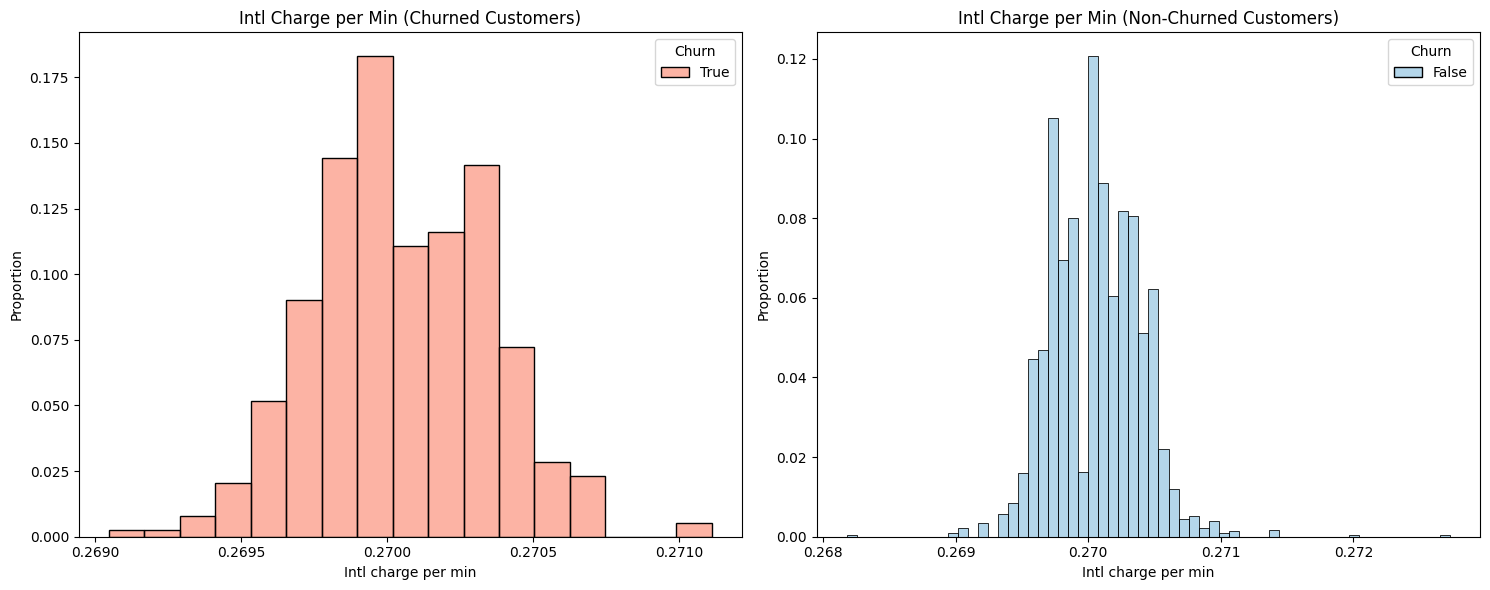

In [13]:
# Tạo cột đơn giá quốc tế trên mỗi phút
df["Intl charge per min"] = df["Total intl charge"] / df["Total intl minutes"]

# Vẽ histogram của đơn giá gọi quốc tế theo churn
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

# Histogram cho khách hàng đã churn
sns.histplot(
    x='Intl charge per min',
    hue='Churn',
    data=df[df['Churn'] == True],
    ax=ax[0],
    stat='proportion',
    palette='Reds'
)
ax[0].set_title('Intl Charge per Min (Churned Customers)')
ax[0].set_xlabel('Intl charge per min')
ax[0].set_ylabel('Proportion')

# Histogram cho khách hàng không churn
sns.histplot(
    x='Intl charge per min',
    hue='Churn',
    data=df[df['Churn'] == False],
    ax=ax[1],
    stat='proportion',
    palette='Blues'
)
ax[1].set_title('Intl Charge per Min (Non-Churned Customers)')
ax[1].set_xlabel('Intl charge per min')
ax[1].set_ylabel('Proportion')

plt.tight_layout()
plt.show()


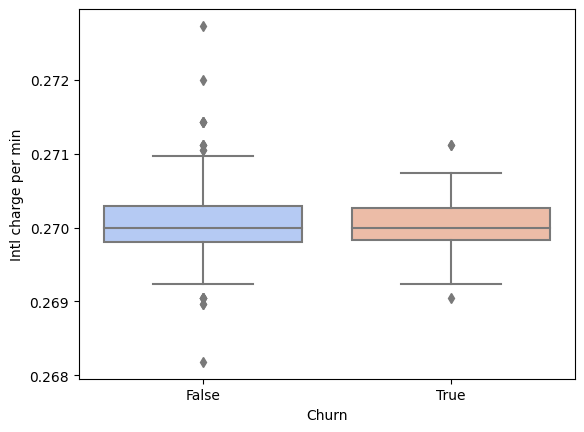

In [14]:
# Plot boxplot of intl charge per min vs. Churn
sns.boxplot(x='Churn', y='Intl charge per min', data=df, palette='coolwarm')
plt.show()

## Phân tích hành vi sử dụng mạng nội địa của Khách Hàng

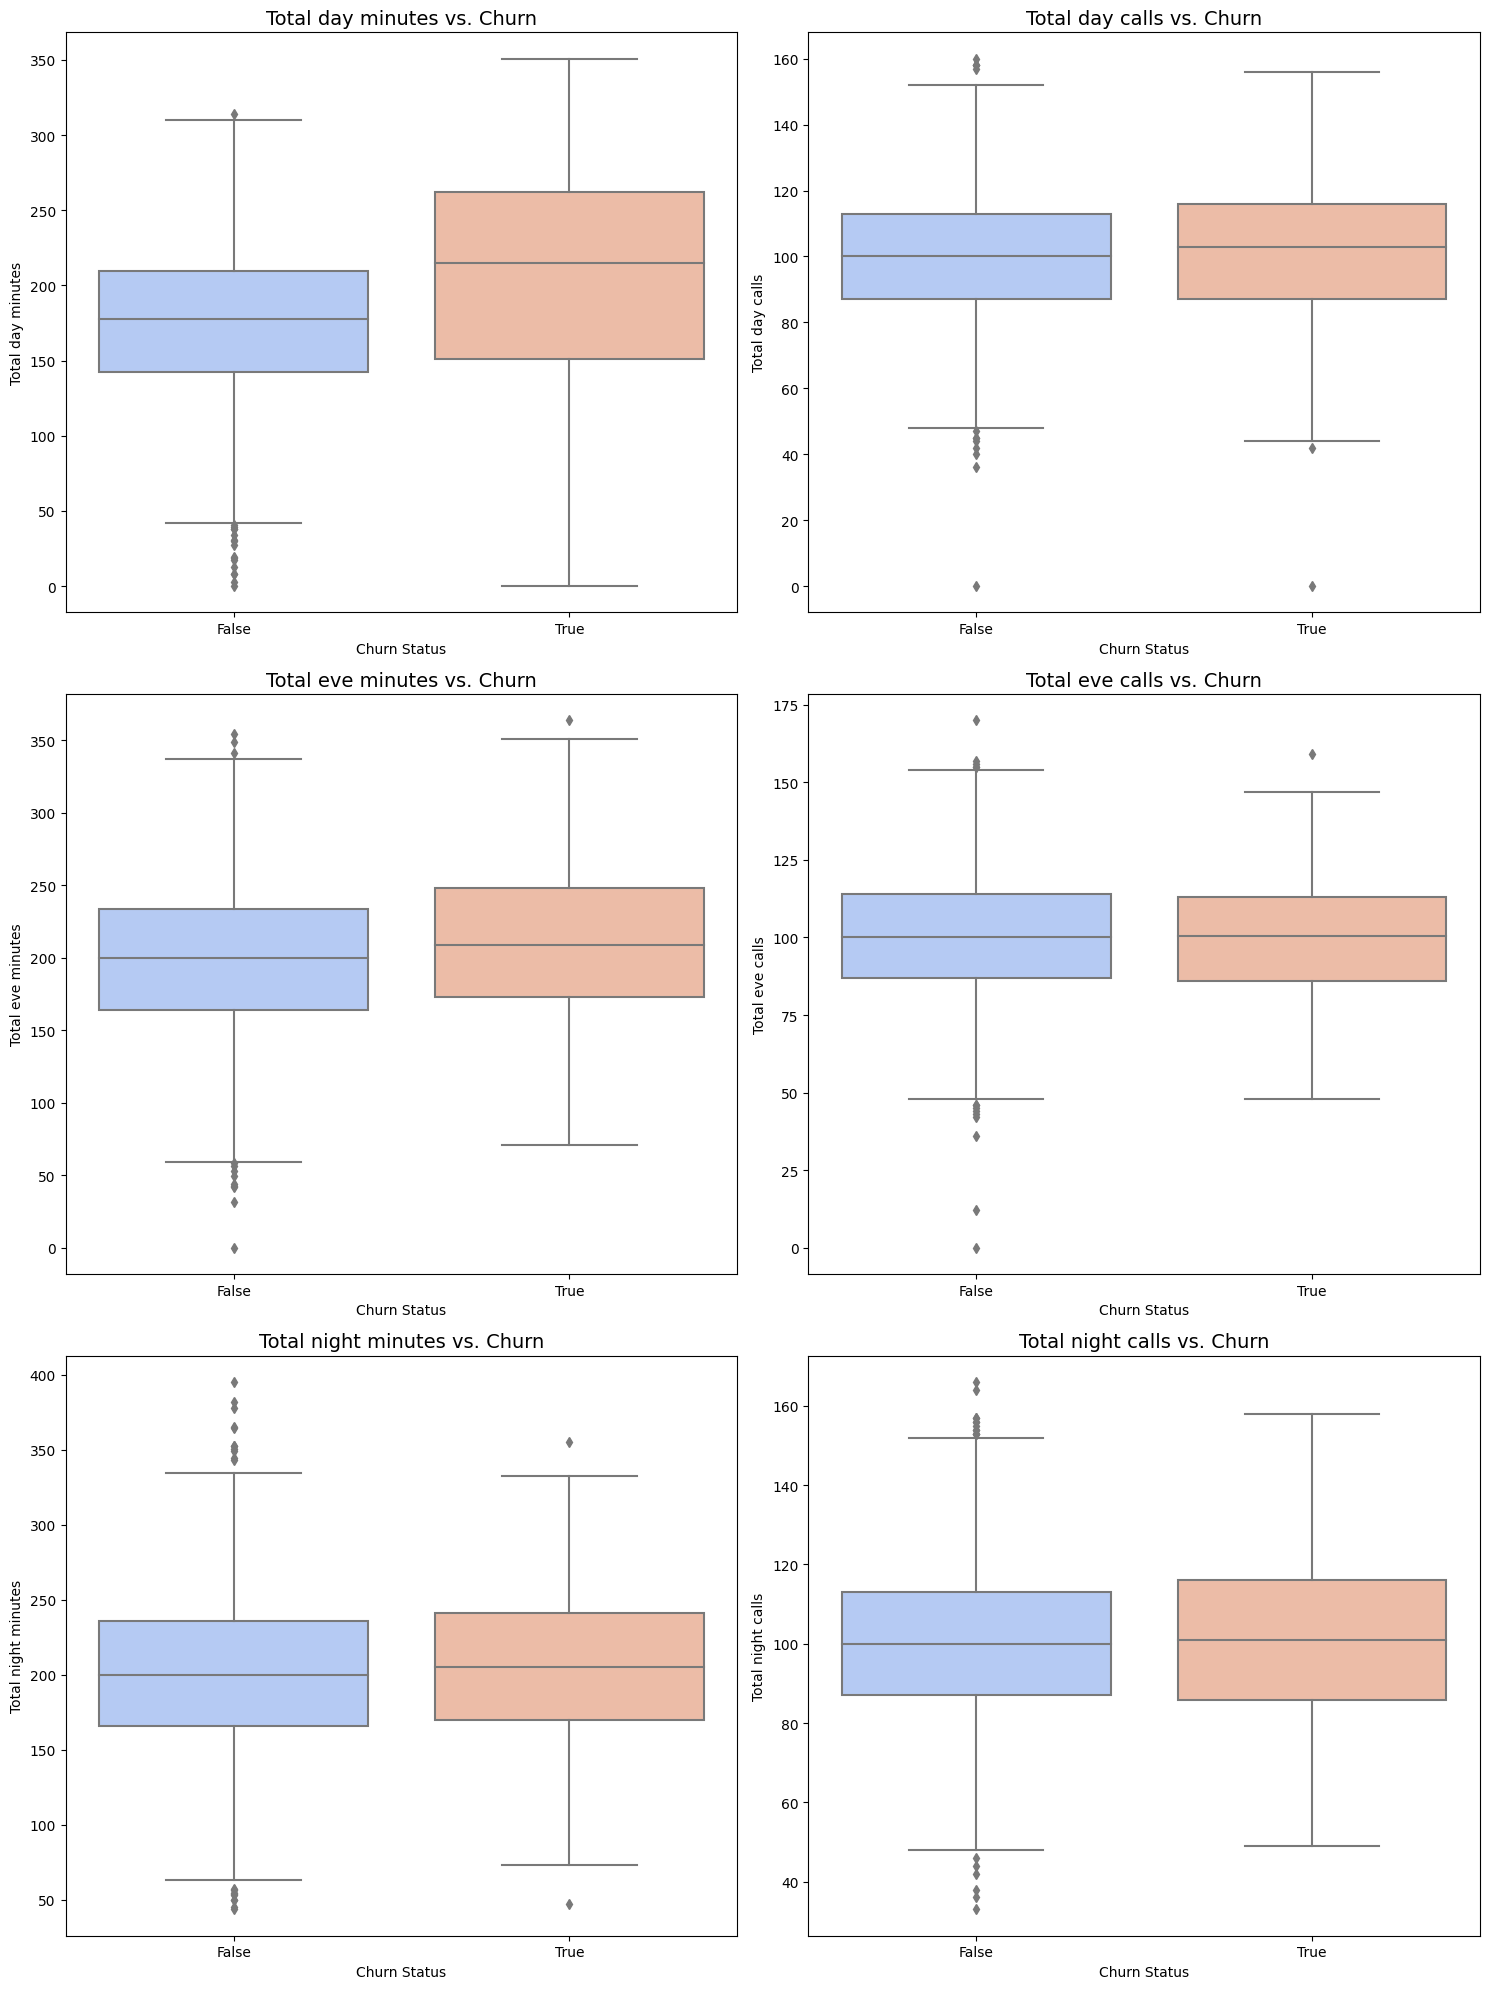

Statistical Summary of Domestic Call Behavior by Churn Status:
      Total day minutes                    Total day calls                    \
                   mean  median        std            mean median        std   
Churn                                                                          
False        175.104346  177.90  50.105334      100.159350  100.0  19.681914   
True         205.181186  214.95  68.490213      101.195876  103.0  21.705279   

      Total eve minutes                    Total eve calls                    \
                   mean  median        std            mean median        std   
Churn                                                                          
False        198.853380  199.55  50.818954      100.036435  100.0  20.258800   
True         209.385309  209.00  50.863718       99.948454  100.5  19.605474   

      Total night minutes                    Total night calls         \
                     mean  median        std              mean

In [17]:
# Các cột cần phân tích (theo hành vi gọi nội địa)
features = [
    'Total day minutes', 'Total day calls',
    'Total eve minutes', 'Total eve calls',
    'Total night minutes', 'Total night calls'
]

# Vẽ boxplot cho từng đặc trưng theo trạng thái Churn
fig, axs = plt.subplots(len(features) // 2, 2, figsize=(15, 20))

for i, feature in enumerate(features):
    row, col = i // 2, i % 2
    sns.boxplot(
        x='Churn',
        y=feature,
        data=df,
        ax=axs[row, col],
        palette='coolwarm'
    )
    axs[row, col].set_title(f'{feature} vs. Churn', fontsize=14)
    axs[row, col].set_xlabel('Churn Status')
    axs[row, col].set_ylabel(feature)

plt.tight_layout()
plt.show()

# Tóm tắt thống kê theo churn
summary = df.groupby('Churn')[features].agg(['mean', 'median', 'std'])
print("Statistical Summary of Domestic Call Behavior by Churn Status:")
print(summary)


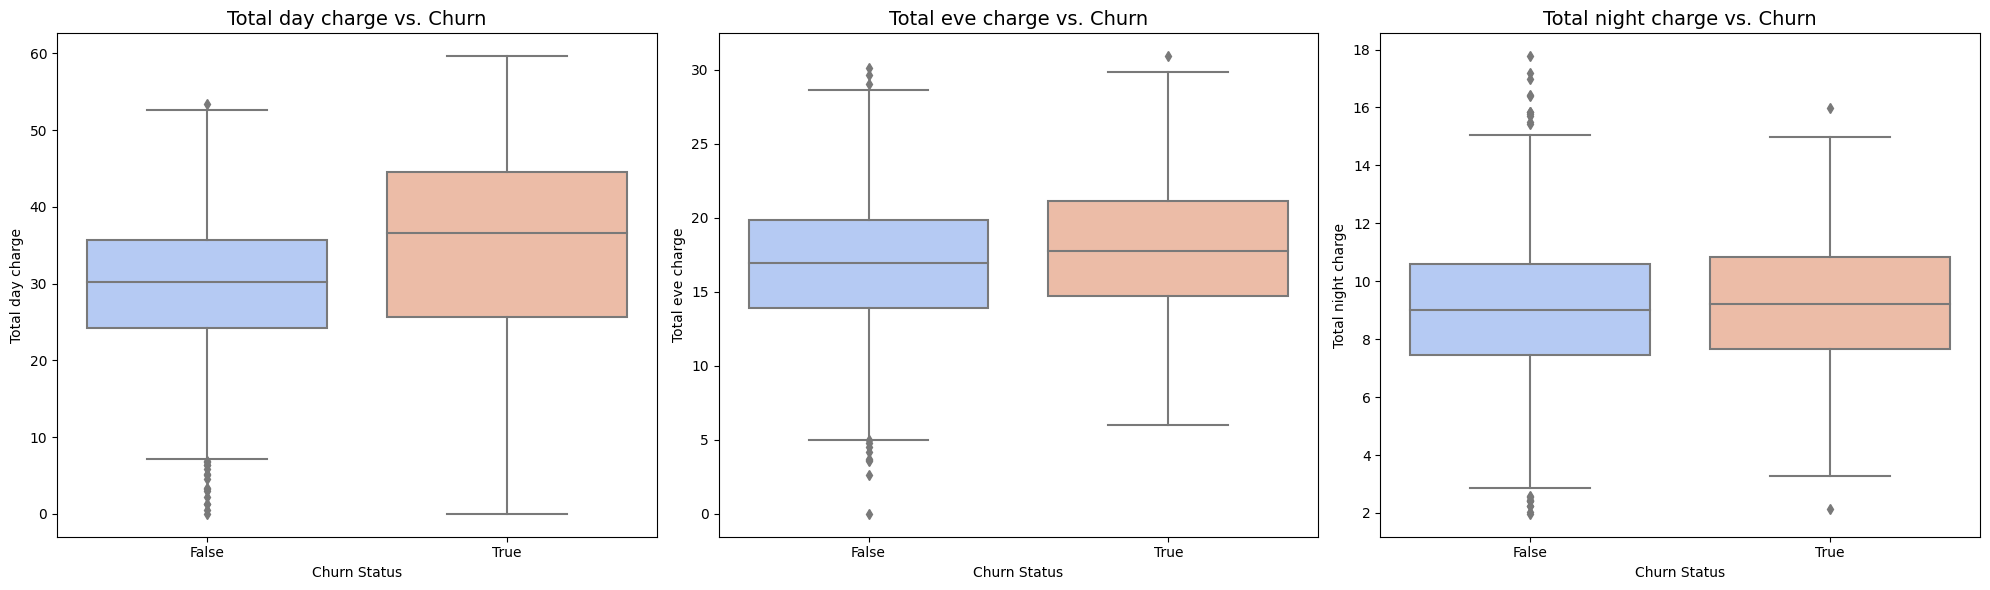

Statistical Summary of Charges by Churn Status:
      Total day charge                   Total eve charge                    \
                  mean median        std             mean  median       std   
Churn                                                                         
False        29.768266  30.24   8.517839        16.902809  16.965  4.319614   
True         34.881340  36.54  11.643479        17.797861  17.765  4.323327   

      Total night charge                   
                    mean median       std  
Churn                                      
False           9.020975  9.000  2.307779  
True            9.238892  9.225  2.140617  


In [19]:
# Các biến liên quan đến phí gọi
features = ['Total day charge', 'Total eve charge', 'Total night charge']

# Vẽ boxplot cho từng loại charge theo churn
fig, axs = plt.subplots(1, 3, figsize=(20, 6))  # 1 hàng, 3 cột

for i, feature in enumerate(features):
    sns.boxplot(
        x='Churn',
        y=feature,
        data=df,
        ax=axs[i],
        palette='coolwarm'
    )
    axs[i].set_title(f'{feature} vs. Churn', fontsize=14)
    axs[i].set_xlabel('Churn Status')
    axs[i].set_ylabel(feature)

plt.tight_layout()
plt.show()

# Tóm tắt thống kê
summary = df.groupby('Churn')[features].agg(['mean', 'median', 'std'])
print("Statistical Summary of Charges by Churn Status:")
print(summary)


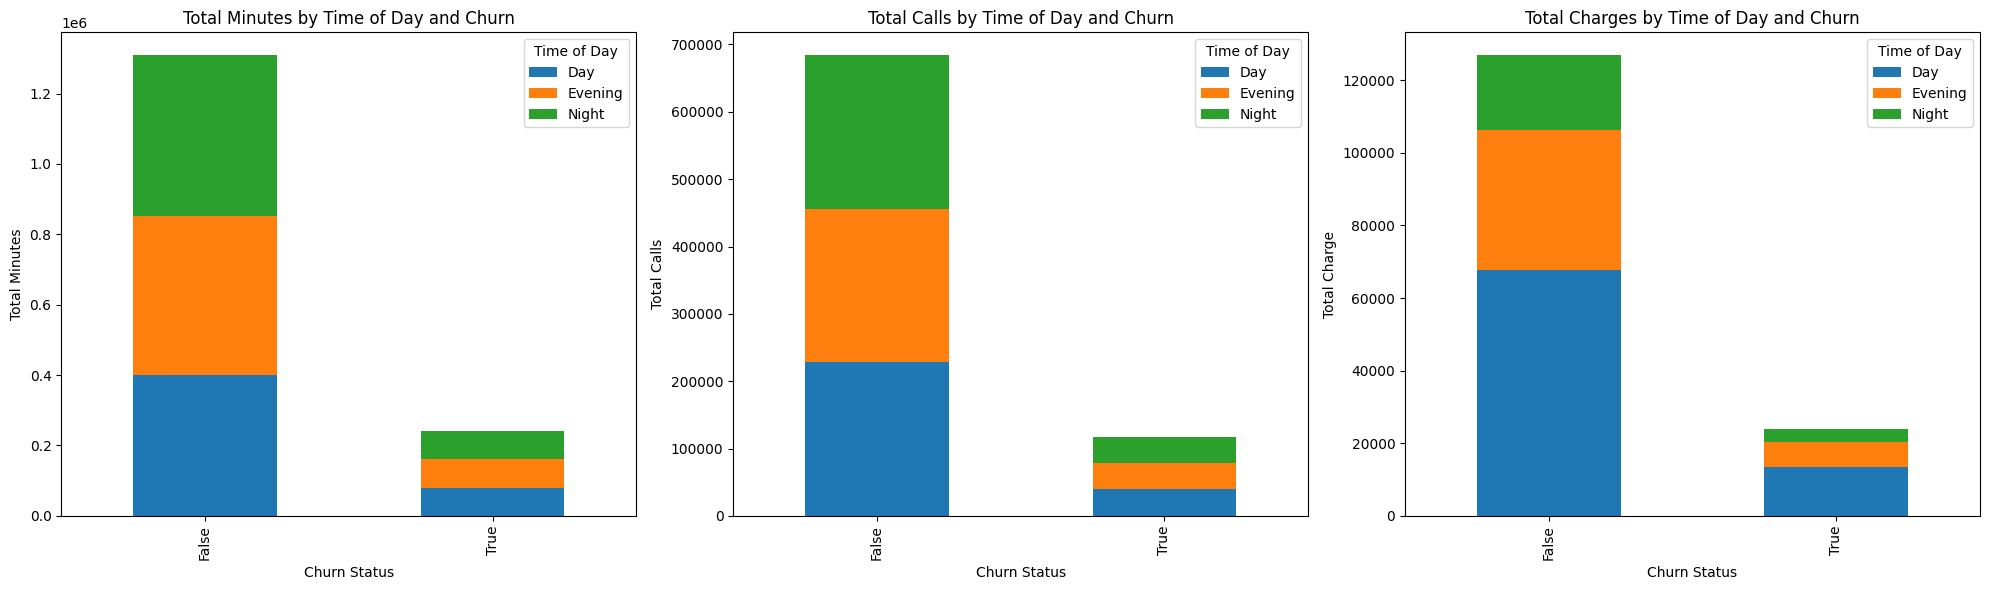

In [21]:

# Tạo các cột tổng

# Tạo các cột tổng
df['Total minutes'] = df['Total day minutes'] + df['Total eve minutes'] + df['Total night minutes']
df['Total calls'] = df['Total day calls'] + df['Total eve calls'] + df['Total night calls']
df['Total charge'] = df['Total day charge'] + df['Total eve charge'] + df['Total night charge']

# Tổng hợp dữ liệu theo Churn, phân theo thời điểm trong ngày
agg_minutes = df.groupby('Churn')[['Total day minutes', 'Total eve minutes', 'Total night minutes']].sum()
agg_calls   = df.groupby('Churn')[['Total day calls', 'Total eve calls', 'Total night calls']].sum()
agg_charge  = df.groupby('Churn')[['Total day charge', 'Total eve charge', 'Total night charge']].sum()

# Tạo biểu đồ
fig, ax = plt.subplots(1, 3, figsize=(20, 6))

# Màu sắc thống nhất
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']  # Day, Evening, Night

# Biểu đồ tổng phút gọi
agg_minutes.plot(kind='bar', stacked=True, ax=ax[0], color=colors)
ax[0].set_title('Total Minutes by Time of Day and Churn')
ax[0].set_xlabel('Churn Status')
ax[0].set_ylabel('Total Minutes')
ax[0].legend(title='Time of Day', labels=['Day', 'Evening', 'Night'])

# Biểu đồ tổng số cuộc gọi
agg_calls.plot(kind='bar', stacked=True, ax=ax[1], color=colors)
ax[1].set_title('Total Calls by Time of Day and Churn')
ax[1].set_xlabel('Churn Status')
ax[1].set_ylabel('Total Calls')
ax[1].legend(title='Time of Day', labels=['Day', 'Evening', 'Night'])

# Biểu đồ tổng phí
agg_charge.plot(kind='bar', stacked=True, ax=ax[2], color=colors)
ax[2].set_title('Total Charges by Time of Day and Churn')
ax[2].set_xlabel('Churn Status')
ax[2].set_ylabel('Total Charge')
ax[2].legend(title='Time of Day', labels=['Day', 'Evening', 'Night'])

plt.tight_layout()
plt.show()
# tính trung bình đầu người


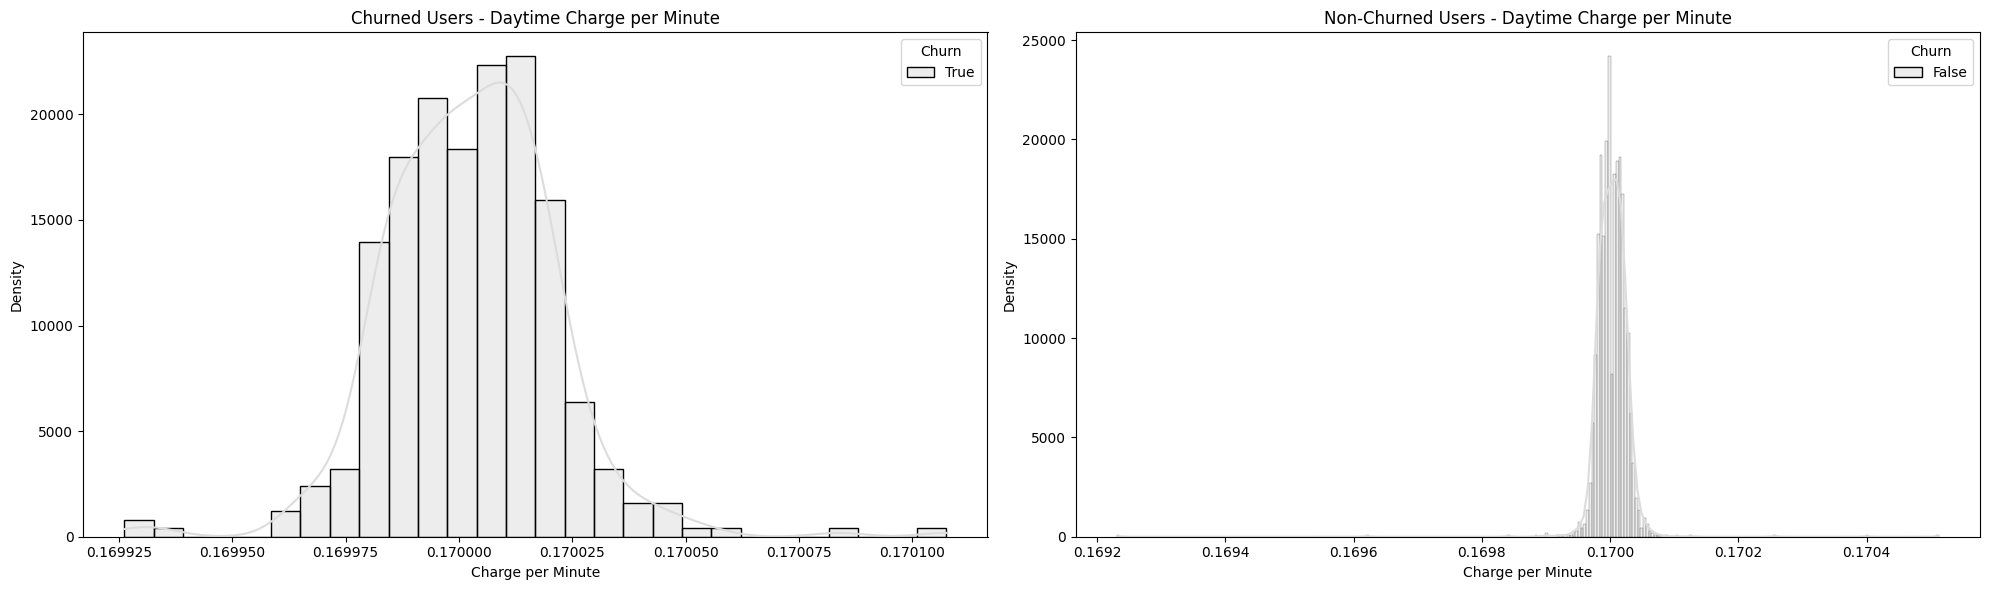

In [22]:
df['Daytime charge per minute'] = df['Total day charge'] / df['Total day minutes']

# Vẽ histogram phân phối
fig, ax = plt.subplots(1, 2, figsize=(20, 6))

# Histogram cho khách hàng churn
sns.histplot(
    data=df[df['Churn'] == True],
    x='Daytime charge per minute',
    hue='Churn',
    palette='coolwarm',
    kde=True,
    stat='density',
    ax=ax[0]
)
ax[0].set_title('Churned Users - Daytime Charge per Minute')
ax[0].set_xlabel('Charge per Minute')
ax[0].set_ylabel('Density')

# Histogram cho khách hàng không churn
sns.histplot(
    data=df[df['Churn'] == False],
    x='Daytime charge per minute',
    hue='Churn',
    palette='coolwarm',
    kde=True,
    stat='density',
    ax=ax[1]
)
ax[1].set_title('Non-Churned Users - Daytime Charge per Minute')
ax[1].set_xlabel('Charge per Minute')
ax[1].set_ylabel('Density')

plt.tight_layout()
plt.show()

## Phân tích nhóm KH dùng voice mail

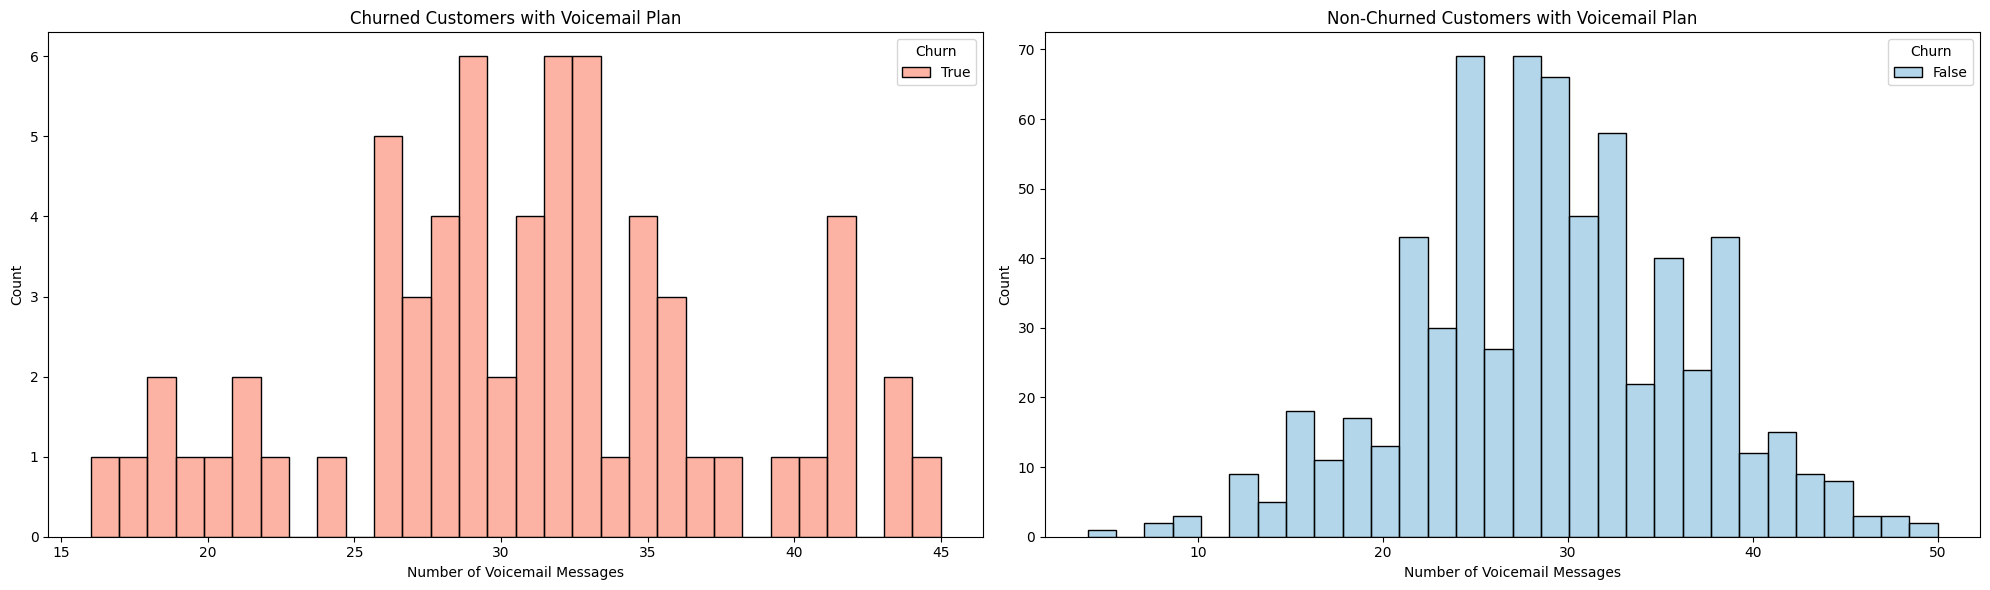

In [28]:
# Lọc ra khách hàng có Voice mail plan (1 là có)
voicemail_users = df[df['Voice mail plan'] == 1]

# Vẽ biểu đồ
fig, axs = plt.subplots(1, 2, figsize=(20, 6))

# Biểu đồ cho khách hàng Churn
sns.histplot(
    data=voicemail_users[voicemail_users['Churn'] == True],
    x='Number vmail messages',
    hue='Churn',
    palette='Reds',
    ax=axs[0],
    bins=30,
    stat='count'
)
axs[0].set_title('Churned Customers with Voicemail Plan')
axs[0].set_xlabel('Number of Voicemail Messages')
axs[0].set_ylabel('Count')

# Biểu đồ cho khách hàng Không Churn
sns.histplot(
    data=voicemail_users[voicemail_users['Churn'] == False],
    x='Number vmail messages',
    hue='Churn',
    palette='Blues',
    ax=axs[1],
    bins=30,
    stat='count'
)
axs[1].set_title('Non-Churned Customers with Voicemail Plan')
axs[1].set_xlabel('Number of Voicemail Messages')
axs[1].set_ylabel('Count')

plt.tight_layout()
plt.show()


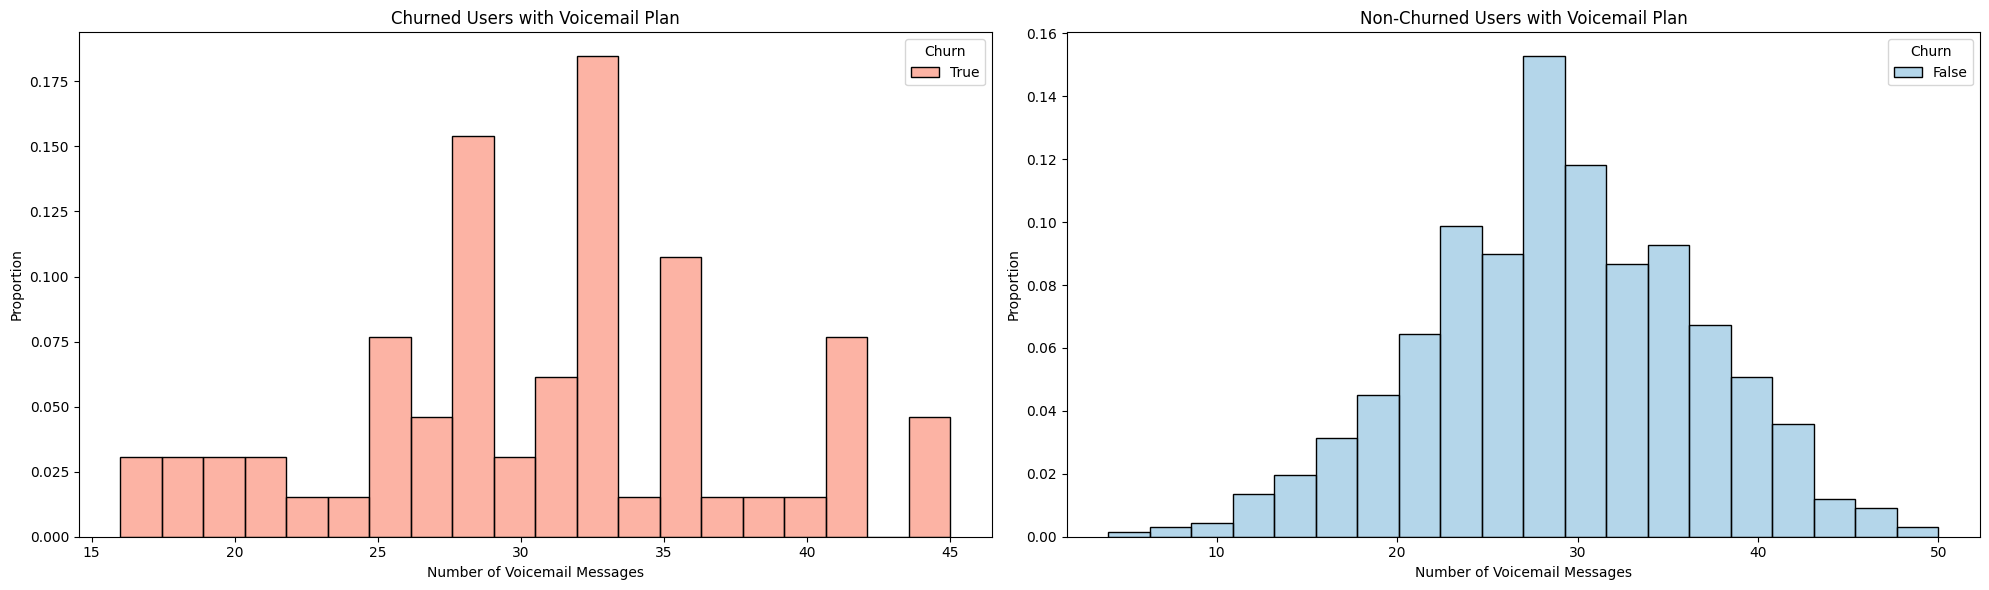

In [29]:
fig, axs = plt.subplots(1, 2, figsize=(20, 6))

# Dữ liệu lọc: khách có voice mail plan
df_vm = df[df['Voice mail plan'] == 1]

# Histogram cho khách hàng Churn (dùng tỷ lệ)
sns.histplot(
    data=df_vm[df_vm['Churn'] == True],
    x='Number vmail messages',
    hue='Churn',
    ax=axs[0],
    palette='Reds',
    bins=20,
    stat='probability'  # <-- đây là điểm khác biệt!
)
axs[0].set_title('Churned Users with Voicemail Plan')
axs[0].set_xlabel('Number of Voicemail Messages')
axs[0].set_ylabel('Proportion')

# Histogram cho khách hàng Không Churn (dùng tỷ lệ)
sns.histplot(
    data=df_vm[df_vm['Churn'] == False],
    x='Number vmail messages',
    hue='Churn',
    ax=axs[1],
    palette='Blues',
    bins=20,
    stat='probability'  # <-- tương tự
)
axs[1].set_title('Non-Churned Users with Voicemail Plan')
axs[1].set_xlabel('Number of Voicemail Messages')
axs[1].set_ylabel('Proportion')

plt.tight_layout()
plt.show()
# ghép lại 2 biểu đồ và thêm churn rate


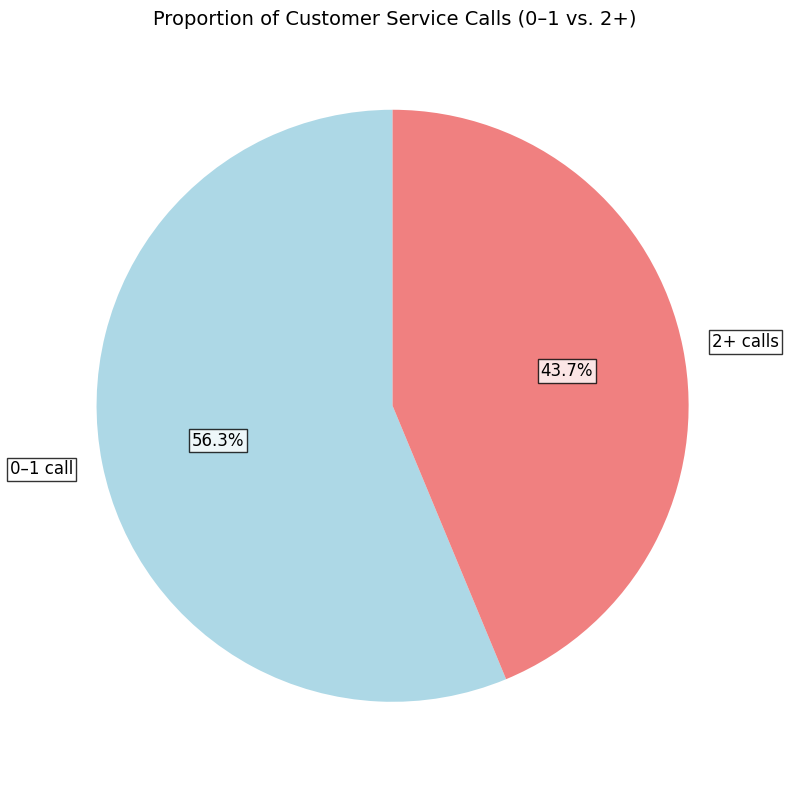

In [32]:
# Phân loại số cuộc gọi tới dịch vụ khách hàng
df['cust_service_call_group'] = df['Customer service calls'].apply(lambda x: '2+ calls' if x >= 2 else '0–1 call')

# Tính tỷ lệ từng nhóm
prop_calls = df['cust_service_call_group'].value_counts(normalize=True)

# Vẽ biểu đồ tròn
plt.figure(figsize=(8, 8))
colors = ['lightblue', 'lightcoral']  # 0–1 call, 2+ calls
plt.pie(
    prop_calls.values,
    labels=prop_calls.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    textprops={'fontsize': 12, 'bbox': {'facecolor': 'white', 'alpha': 0.8, 'pad': 2}}
)
plt.title('Proportion of Customer Service Calls (0–1 vs. 2+)', fontsize=14)
plt.axis('equal')  # Giữ hình tròn không bị méo
plt.tight_layout()
plt.show()


Text(0.5, 0, 'Customer Service Calls')

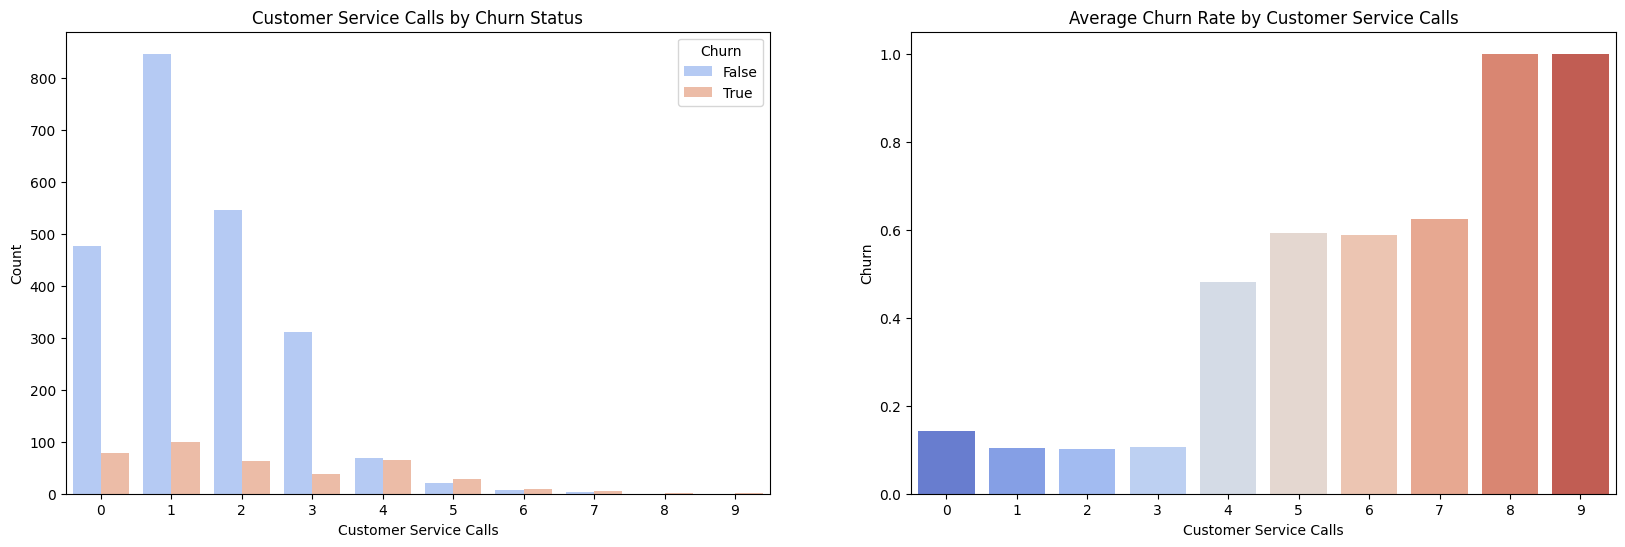

In [36]:
 # Churn rate by customer service calls

fig, ax = plt.subplots(1, 2, figsize=(20, 6))

sns.countplot(x='Customer service calls', hue='Churn', data=df, ax=ax[0], palette='coolwarm', dodge=True)
ax[0].set_title('Customer Service Calls by Churn Status')
ax[0].set_xlabel('Customer Service Calls')
ax[0].set_ylabel('Count')

sns.barplot(x='Customer service calls', y='Churn', data=df, ax=ax[1], palette='coolwarm',errorbar=None)
ax[1].set_title('Average Churn Rate by Customer Service Calls')
ax[1].set_xlabel('Customer Service Calls')